# Зображення як багтовимірні масиви та підготовка зображеннь до подальшого аналіщу.

In [8]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

import skimage  # scikit-image

In [6]:
demo_arr = np.array([0, 1, 4, 6, 2])
print(demo_arr)
print(demo_arr.dtype)

[0 1 4 6 2]
int64


In [ ]:
demo_arr <1

array([ True, False, False, False, False])

In [8]:
print(demo_arr*2)

[ 0  2  8 12  4]


In [10]:
arr_2d = np.array([[1,1,1],[2,2,2],[3,3,3]])  # "зображення" розміром 3x3 пікседі

print(arr_2d.shape)
arr_2d

(3, 3)


array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [14]:
arr_2d[2,2]

np.int64(3)

In [17]:
arr_2d[:2, 1]
arr_2d[0:2]  # другий індекс не включається в зріз
arr_2d[1:]  # перший індекс включається в зріз

array([[2, 2, 2],
       [3, 3, 3]])

In [ ]:
arr_2d + np.array([1,2,3]) додавання вектора по рядках

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [20]:
arr_2d + np.array([[1],[2],[3]])  # додавання вектора по стовбцях

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6]])

In [21]:
arr_3d = np.array([[[0,0],  # 3 "кадри" розміром 2x2 пікселі
                    [0,0]],
                   [[1,1],
                    [1,1]],
                   [[2,2],
                    [2,2]]])

print(arr_3d.shape)
arr_3d

(3, 2, 2)


array([[[0, 0],
        [0, 0]],

       [[1, 1],
        [1, 1]],

       [[2, 2],
        [2, 2]]])

In [23]:
for frame,z in arr_3d:  # ітерація відбувається по першому виміру масиву
    print(frame.shape)
    print(z)
    print(frame)
    print('---')

(2,)
[0 0]
[0 0]
---
(2,)
[1 1]
[1 1]
---
(2,)
[2 2]
[2 2]
---


In [10]:
# demo_image = skimage.data.human_mitosis()
image = tiff.imread('../demo_data/2D_grey_matter_neurofilaments.tif')
print(image.dtype)
print(image.shape)

uint16
(1600, 1600)


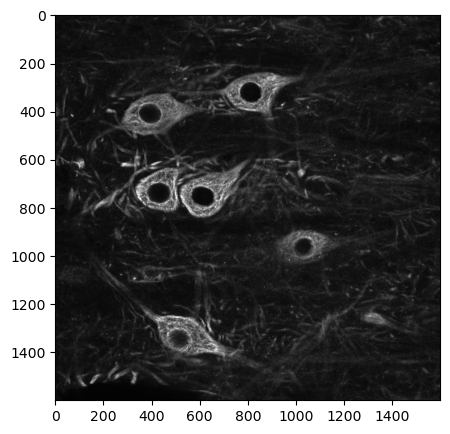

In [11]:
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='Greys_r')

(400, 400)


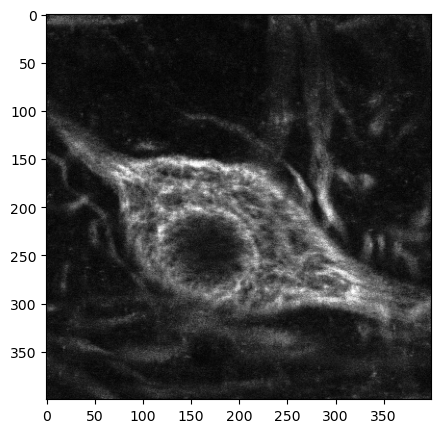

In [28]:
crop_image = image[1100:1500,350:750]
print(crop_image.shape)

plt.figure(figsize=(5,5))
plt.imshow(crop_image, cmap='Greys_r')

In [29]:
from matplotlib.colors import LinearSegmentedColormap

def plot_linearmap(cdict):
    ''' Функція для візуалізації кольорової мапи.
    Не питайте, як це працює, це matplotlib-магія з глибин stack-overflow.
    
    '''
    newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), constrained_layout=True)
    col = ['r', 'g', 'b']
    for i in range(3):
        ax.plot(np.arange(256)/256, rgba[:, i], color=col[i])
    ax.set_xlabel('itensity')
    ax.set_ylabel('RGB')
    plt.show()

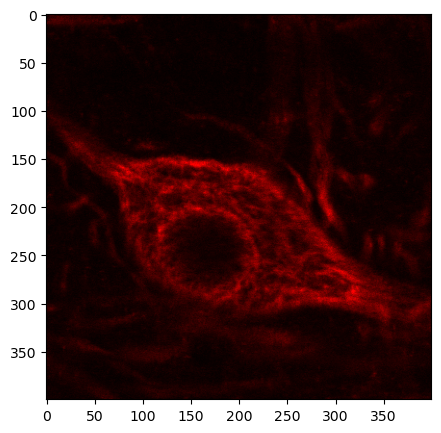

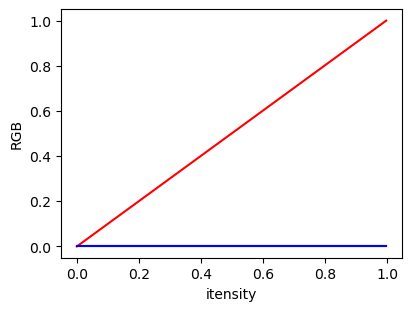

In [30]:
# створення та відображення кольорової мапи
dict_red = {'red':(
            (0.0, 0.0, 0.0),
            # (0.25, 0.1, 0.1),  # збільшення контрасту шляхом заниження яскравості пікселів низької інтенсивності
            (1.0, 1.0, 1.0)),
            'blue':(
            (0.0, 0.0, 0.0),
            (1.0, 0.0, 0.0)),
            'green':(
            (0.0, 0.0, 0.0),
            (1.0, 0.0, 0.0))}
cmap_red = LinearSegmentedColormap('Red_cmap', dict_red)

plt.figure(figsize=(5,5))
plt.imshow(crop_image, cmap=cmap_red)


plot_linearmap(dict_red)

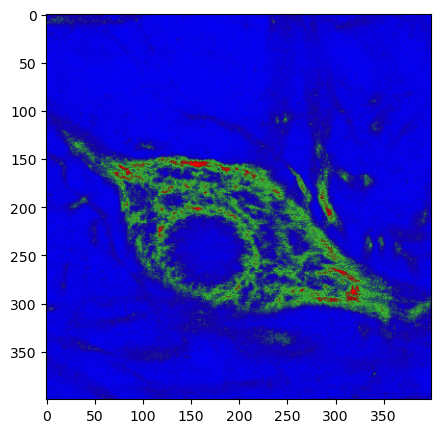

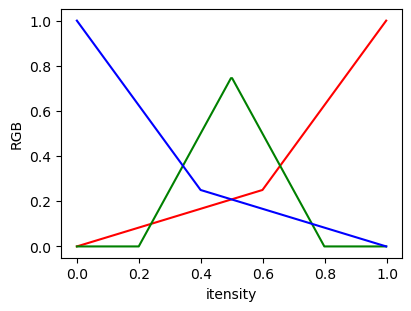

In [32]:
dict_blue_red = {'red':(
                 (0.0, 0.0, 0.0),
                 (0.6, 0.25, 0.25),
                 (1.0, 1.0, 1.0)),
                 'blue':(
                 (0.0, 1.0, 1.0),
                 (0.4, 0.25, 0.25),
                 (1.0, 0.0, 0.0)),
                 'green':(
                 (0.0, 0.0, 0.0),
                 (0.2, 0.0, 0.0),
                 (0.5, 0.75, 0.75),
                 (0.8, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}
cmap_blue_red = LinearSegmentedColormap('BR_cmap', dict_blue_red)

plt.figure(figsize=(5,5))
plt.imshow(crop_image, cmap=cmap_blue_red)

plot_linearmap(dict_blue_red)

196
4095


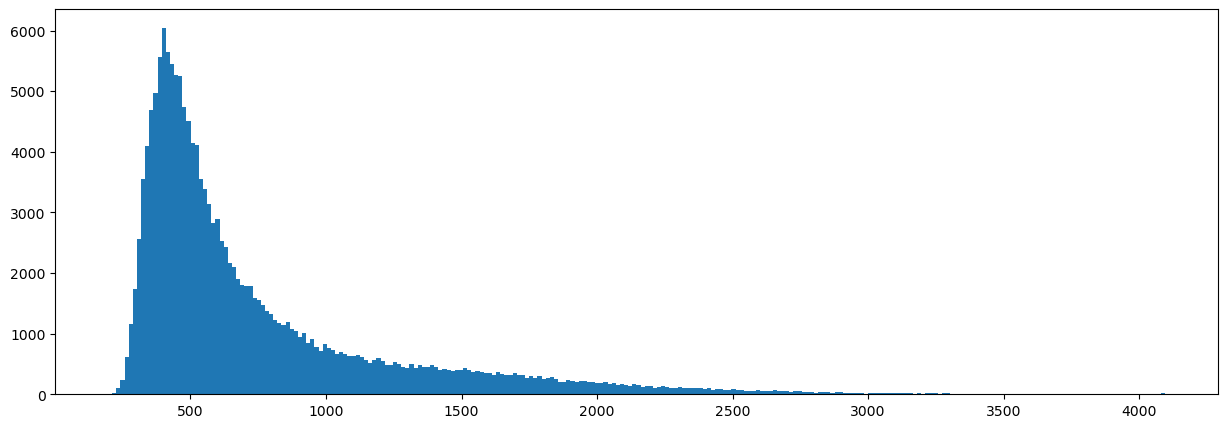

In [33]:
print(crop_image.min())
print(crop_image.max())

plt.figure(figsize=(15,5))
plt.hist(crop_image.ravel(), bins=256)
plt.show()

Корекція фонової інтенсивності

log scale a good way to check fone!

(320, 320)
uint16
131
3299


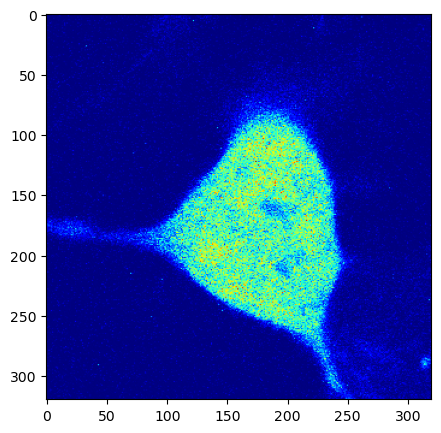

In [36]:
bad_image = tiff.imread('../demo_data/4D_HEK_spectral_time_series.tiff')[1,4]
print(bad_image.shape)
print(bad_image.dtype)
print(bad_image.min())
print(bad_image.max())

plt.figure(figsize=(5,5))
plt.imshow(bad_image, cmap='jet')

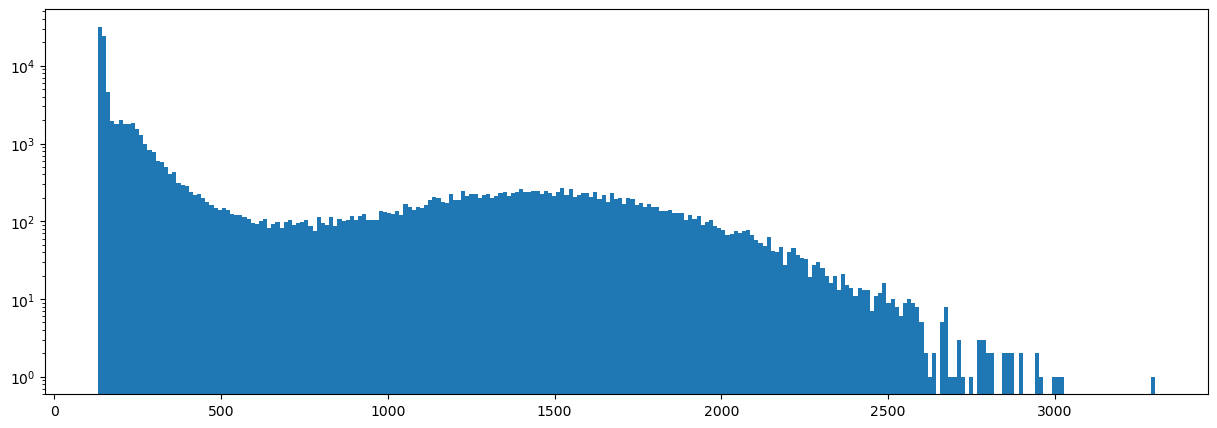

In [37]:
plt.figure(figsize=(15,5))
plt.hist(bad_image.ravel(), bins=256)
plt.yscale('log')
plt.show()

154


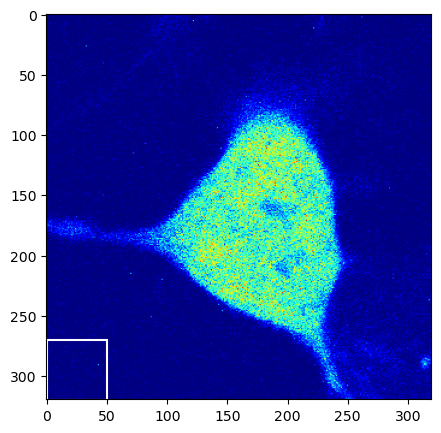

In [38]:
roi_background_int = np.mean(bad_image[0:50, 270:], dtype=np.uint32)
print(roi_background_int)

import matplotlib.patches as patches
crop_rect = patches.Rectangle((0, 270), 50, 50,
                              linewidth=1.5, edgecolor='white', facecolor='none')

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(bad_image, cmap='jet')
ax.add_patch(crop_rect)
plt.show()

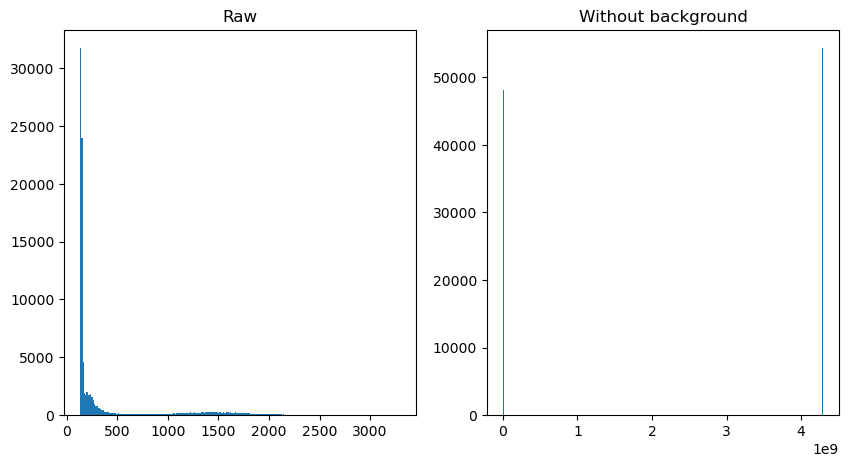

In [39]:
bad_image_corrected = bad_image - roi_background_int

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,5))

ax0.hist(bad_image.ravel(), bins=256)
# ax0.set_yscale('log')
ax0.set_title('Raw')

ax1.hist(bad_image_corrected.ravel(), bins=256)
# ax1.set_yscale('log')
ax1.set_title('Without background')

plt.show()

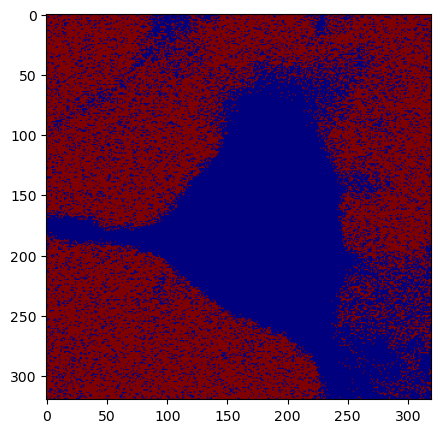

In [40]:
plt.subplots(figsize=(5,5))
plt.imshow(bad_image_corrected, cmap='jet')
plt.show()

Uin не може бути негативним

In [41]:
# перший перцентіль значень інтенсивності як оцінка фону є більш стіким до коливань фону на відміну від мінімального значення (0 перцентиль)
perc_background_int = np.percentile(bad_image, 1)
perc_background_int

np.float64(137.0)

In [42]:
# віднімання фону і перевірка на наявність від'ємних значень
bad_image_pre_corrected = bad_image - perc_background_int
bad_image_pre_corrected.min()

np.float64(-6.0)

In [43]:
# корекція від'ємних значень
bad_image_corrected = bad_image_pre_corrected.clip(min=0)
bad_image_corrected.min()

np.float64(0.0)

Data type after correction: float64, image size 819.2 kB
Final data type: uint16, image size 204.8 kB


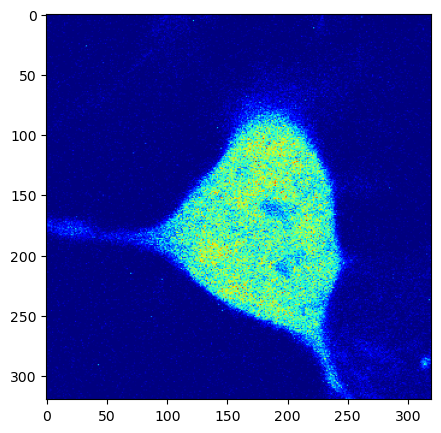

In [44]:
# конвертація відкорегованого зображення
print(f'Data type after correction: {bad_image_corrected.dtype}, image size {bad_image_corrected.nbytes/1000} kB')

bad_image_preprocessed = bad_image_corrected.astype(np.uint16)

print(f'Final data type: {bad_image_preprocessed.dtype}, image size {bad_image_preprocessed.nbytes/1000} kB')

plt.subplots(figsize=(5,5))
plt.imshow(bad_image_preprocessed, cmap='jet')
plt.show()

Text(0.5, 1.0, 'Without background')

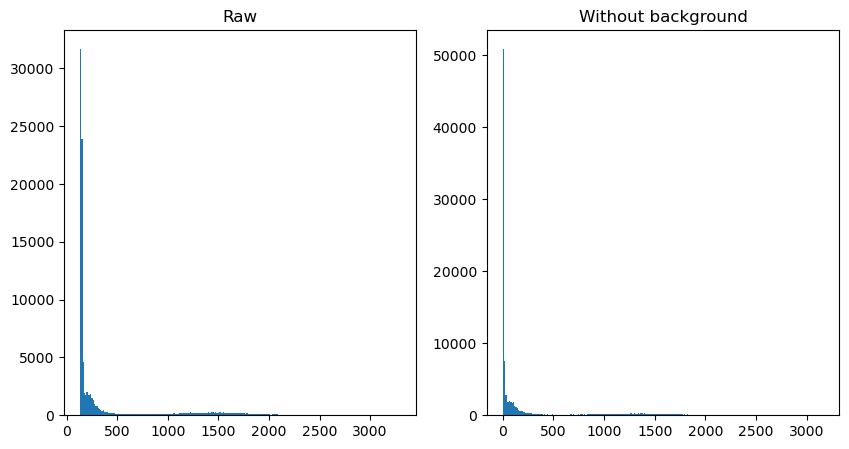

In [45]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10,5))

ax0.hist(bad_image.ravel(), bins=256)
# ax0.set_yscale('log')
ax0.set_title('Raw')

ax1.hist(bad_image_preprocessed.ravel(), bins=256)
# ax1.set_yscale('log')
ax1.set_title('Without background')


Оформлення всіх кроків корекції фонової інтенсивності у функцію

In [1]:
def background_correction(input_img:np.ndarray, background_percentile:float=1):
    back_int = np.percentile(input_img, background_percentile)
    corr_img = input_img - back_int
    corr_img = corr_img.clip(min=0)
    return corr_img.astype(input_img.dtype)

NameError: name 'np' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def select_region(input_img:np.ndarray,y1,y2,x1,x2):
    crop_image = input_img[y1:y2,x1:x2]
    plt.figure(figsize=(5,5))
    plt.imshow(crop_image, cmap='Greys_r')
    return crop_image.astype(input_img.dtype)

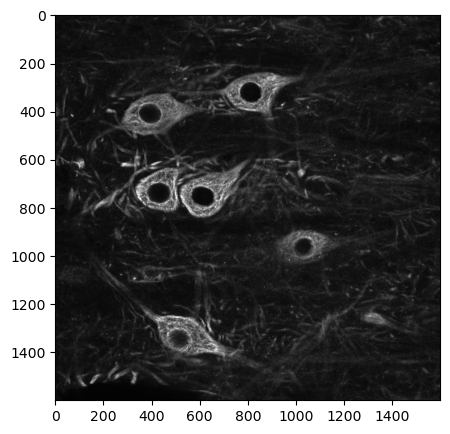

In [5]:
import tifffile as tiff
image = tiff.imread('../demo_data/2D_grey_matter_neurofilaments.tif')
plt.figure(figsize=(5,5))
plt.imshow(image, cmap='Greys_r')

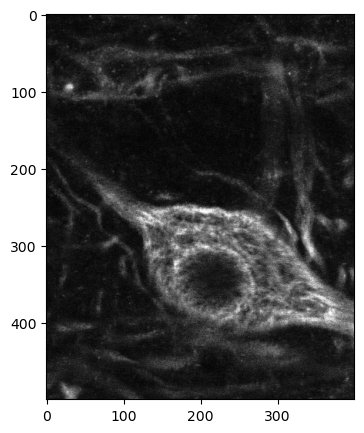

In [7]:
x = select_region(image,1000,1500, 300, 700)


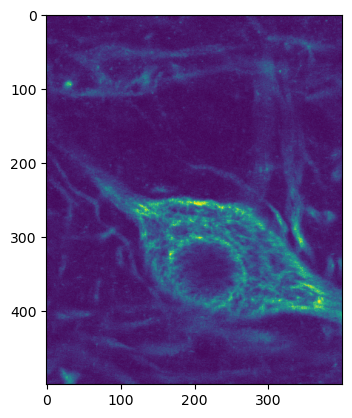

In [9]:
plt.imshow(x)

In [ ]:
def background_correction(input_img:np.ndarray, background_percentile:float =1):
    back_int = np.percentile(input_img, background_percentile)
    corr_img = input_img - back_int
    corr_img = corr_img.clip(min=0)
    return corr_img.astype(input_img.dtype)

Acridine Orange images were acquired using a 20× objective on the Cytation 5 imaging system. Image acquisition utilized the following LED cube channels:
1. GFP channel (excitation/emission = 469/525 nm) for the visualization of nuclei, nucleoli, and cytoplasm;
2. PI channel (excitation/emission = 531/647 nm) for the detection of acidic vesicles.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def crop_function(input_img: np.ndarray, x1, x2, y1, y2):
    
    crop_image = input_img[y1:y2, x1:x2]
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(input_img)
    
    rect = patches.Rectangle(
        (x1, y1), x2 - x1, y2 - y1, 
        linewidth=2, edgecolor='red', facecolor='none'
    )
    
    ax[0].add_patch(rect)
    ax[0].set_title("Original Image (ROI highlighted)")
    
    ax[1].imshow(crop_image)
    ax[1].set_title("Cropped ROI")
    
    plt.tight_layout()
    plt.show()
    
    return crop_image.astype(input_img.dtype)

In [12]:
import tifffile as tiff 
GFP =  tiff.imread("/Users/romankoval/BioInUA_2025_img_analysis/course_data/my_data/B8_01_1_9_GFP_001.tif")
PI =  tiff.imread("/Users/romankoval/BioInUA_2025_img_analysis/course_data/my_data/B8_01_2_9_Propidium Iodide_001.tif")

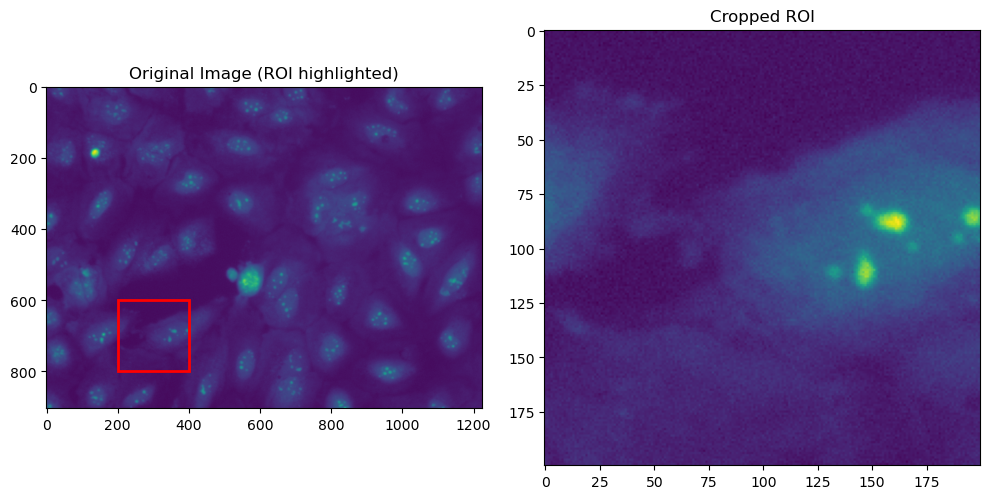

In [20]:
GFP_crop = crop_function(GFP ,200,400, 600,800)

In [22]:

import numpy as np
import matplotlib.pyplot as plt

def background_correction(input_img: np.ndarray, background_percentile: float = 1):
  

    back_int = np.percentile(input_img, background_percentile)

    corr_img = input_img - back_int
    corr_img = corr_img.clip(min=0)


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(input_img, cmap='Greys_r')
    ax[0].set_title("Original Image")


    ax[1].imshow(corr_img, cmap='Greys_r')
    ax[1].set_title(f"Background-corrected (−{background_percentile}th percentile)")


    plt.tight_layout()
    plt.show()

    return corr_img.astype(input_img.dtype)


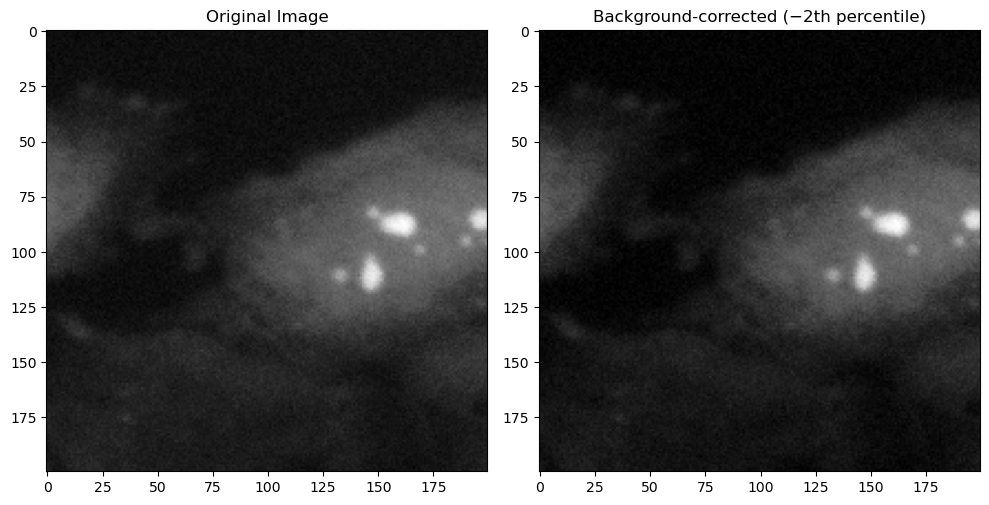

array([[ 272,  128,  144, ...,  688,  384,  560],
       [   0,  480,  448, ...,  192,  144,  144],
       [ 272,    0,  416, ...,  640,  416,  240],
       ...,
       [1328,  944,  688, ...,  976, 1120, 1008],
       [1632,  848, 1008, ...,  848, 1152,  992],
       [1376, 1120,  896, ...,  816, 1200, 1280]],
      shape=(200, 200), dtype=uint16)

In [24]:
background_correction(GFP_crop, 2)